In [8]:
!pip install nltk
import nltk
import pandas as pd
import numpy as np

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Read in files

In [9]:
revs = pd.read_csv("../all_full_reviews.csv").drop(["Unnamed: 0"],axis=1)

# Model 3.1 KNN Regressor - "Words", "Sentiment"

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_rows = 5
y_tr = revs.rating

In [1]:
# tfidf vectorizor on the reviews

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# for train data - get id-idf sparse matrix 
vec = TfidfVectorizer(norm=None, max_df=.7, max_features=400) # Do not normalize.
revs.words = revs.words.fillna("")
vec.fit(revs.words) # This determines the vocabulary.
tf_idf_sparse_tr = vec.transform(revs.words)
tf_idf_sparse_tr

<10000x400 sparse matrix of type '<class 'numpy.float64'>'
	with 266955 stored elements in Compressed Sparse Row format>

In [12]:
x_tr = revs[["neg","pos"]]
x_tr = pd.concat([x_tr,pd.DataFrame(tf_idf_sparse_tr.todense())],axis=1)

In [3]:
# cross validation for KNN regressor

17

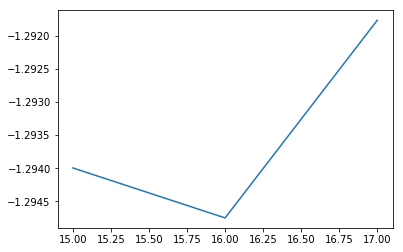

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
ks = pd.Series(range(15, 18, 1))
ks.index = ks
def cv(k):
    model = KNeighborsRegressor(n_neighbors=k)
    return cross_val_score(model, x_tr, y_tr, cv=2, scoring="neg_mean_squared_error").mean()

cv_error = ks.apply(cv)
cv_error.plot.line()
cv_error.idxmax()

In [2]:
# best KNN

## Negative Mean Squared Error

In [14]:
cv_error.max()

-1.2917622837370242